![Autism](https://th.bing.com/th/id/OIP.RVMXyfUhidIe4lHptJDaAQHaEK?pid=ImgDet&rs=1)


# Autism

Autism, also known as Autism Spectrum Disorder (ASD), is a neurodevelopmental condition characterized by challenges in social interaction, communication, and repetitive behaviors. Individuals with autism may exhibit a wide range of abilities and symptoms, forming a spectrum. Understanding and accurately classifying autism can be a complex task due to the diversity within the spectrum. Machine Learning (ML) plays a vital role in addressing this challenge by leveraging algorithms to analyze patterns and make predictions based on data.

## Data

ID - ID of the patient

A1_Score to A10_Score - Score based on Autism Spectrum Quotient (AQ) 10 item screening tool

age - Age of the patient in years

gender - Gender of the patient

ethnicity - Ethnicity of the patient

jaundice - Whether the patient had jaundice at the time of birth

autism - Whether an immediate family member has been diagnosed with autism

contry_of_res - Country of residence of the patient

used_app_before - Whether the patient has undergone a screening test before

result - Score for AQ1-10 screening test

age_desc - Age of the patient

relation - Relation of patient who completed the test

Class/ASD - Classified result as 0 or 1. Here 0 represents No and 1 represents Yes. This is the target column, and during submission submit the values as 0 or 1 only.

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import confusion_matrix, accuracy_score, classification_report, roc_auc_score, roc_curve
from keras.models import Sequential
from keras.layers import Dense
from sklearn.ensemble import RandomForestClassifier
from deap import base, creator, tools, algorithms

In [2]:
train=pd.read_csv(r"/kaggle/input/autism-prediction/Autism-prediction/train.csv")
test=pd.read_csv(r"/kaggle/input/autism-prediction/Autism-prediction/test.csv")
sample_submission=pd.read_csv(r"/kaggle/input/autism-prediction/Autism-prediction/sample_submission.csv")

In [3]:
train.tail()

,ID,A1_Score,A2_Score,A3_Score,A4_Score,A5_Score,A6_Score,A7_Score,A8_Score,A9_Score,...,gender,ethnicity,jaundice,austim,contry_of_res,used_app_before,result,age_desc,relation,Class/ASD
795,796,1,1,1,1,1,1,1,1,1,...,f,White-European,no,yes,United States,no,13.390868,18 and more,Self,1
796,797,1,1,0,0,1,0,0,0,1,...,f,Asian,no,no,New Zealand,no,9.454201,18 and more,Self,0
797,798,0,0,0,0,0,0,1,0,1,...,m,White-European,yes,no,Jordan,no,6.805509,18 and more,Self,1
798,799,1,1,1,1,1,1,0,1,1,...,f,Middle Eastern,no,yes,United States,no,3.682732,18 and more,Relative,0
799,800,1,0,0,1,1,0,0,1,1,...,f,Asian,no,no,New Zealand,no,12.060168,18 and more,Self,0


In [4]:
train.describe()

,ID,A1_Score,A2_Score,A3_Score,A4_Score,A5_Score,A6_Score,A7_Score,A8_Score,A9_Score,A10_Score,age,result,Class/ASD
count,800.0000,800.000000,800.00000,800.000000,800.00000,800.000000,800.00000,800.000000,800.000000,800.000000,800.000000,800.000000,800.000000,800.000000
mean,400.5000,0.582500,0.28625,0.321250,0.41500,0.457500,0.20875,0.273750,0.717500,0.316250,0.460000,28.612306,7.058530,0.231250
std,231.0844,0.493455,0.45229,0.467249,0.49303,0.498502,0.40667,0.446161,0.450497,0.465303,0.498709,12.872373,3.788969,0.421896
min,1.0000,0.000000,0.00000,0.000000,0.00000,0.000000,0.00000,0.000000,0.000000,0.000000,0.000000,9.560505,-2.594654,0.000000
25%,200.7500,0.000000,0.00000,0.000000,0.00000,0.000000,0.00000,0.000000,0.000000,0.000000,0.000000,19.282082,4.527556,0.000000
50%,400.5000,1.000000,0.00000,0.000000,0.00000,0.000000,0.00000,0.000000,1.000000,0.000000,0.000000,25.479960,6.893472,0.000000
75%,600.2500,1.000000,1.00000,1.000000,1.00000,1.000000,0.00000,1.000000,1.000000,1.000000,1.000000,33.154755,9.892981,0.000000
max,800.0000,1.000000,1.00000,1.000000,1.00000,1.000000,1.00000,1.000000,1.000000,1.000000,1.000000,72.402488,13.390868,1.000000


In [5]:
train.isna().sum()

ID                 0
A1_Score           0
A2_Score           0
A3_Score           0
A4_Score           0
A5_Score           0
A6_Score           0
A7_Score           0
A8_Score           0
A9_Score           0
A10_Score          0
age                0
gender             0
ethnicity          0
jaundice           0
austim             0
contry_of_res      0
used_app_before    0
result             0
age_desc           0
relation           0
Class/ASD          0
dtype: int64

# visualization

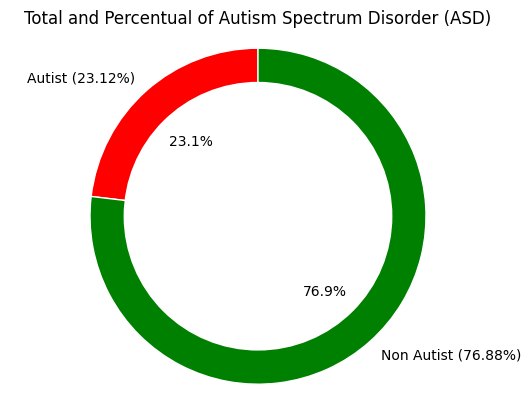

In [31]:
autism_map = {1: 'Autist', 0: 'Non Autist'}
autism_colors = ['red', 'green']

total_count = len(train)
autist_count = train['Class/ASD'].sum()
non_autist_count = total_count - autist_count

autist_percent = autist_count / total_count * 100
non_autist_percent = non_autist_count / total_count * 100

fig, ax = plt.subplots()

ax.pie([autist_percent, non_autist_percent], labels=[f'Autist ({autist_percent:.2f}%)', f'Non Autist ({non_autist_percent:.2f}%)'],
       autopct='%1.1f%%', startangle=90, colors=autism_colors, wedgeprops=dict(width=0.4, edgecolor='w'))

centre_circle = plt.Circle((0,0),0.80,fc='white')
fig = plt.gcf()
fig.gca().add_artist(centre_circle)

# Equal aspect ratio ensures that pie is drawn as a circle.
ax.axis('equal')  

plt.title('Total and Percentual of Autism Spectrum Disorder (ASD)')
plt.show()


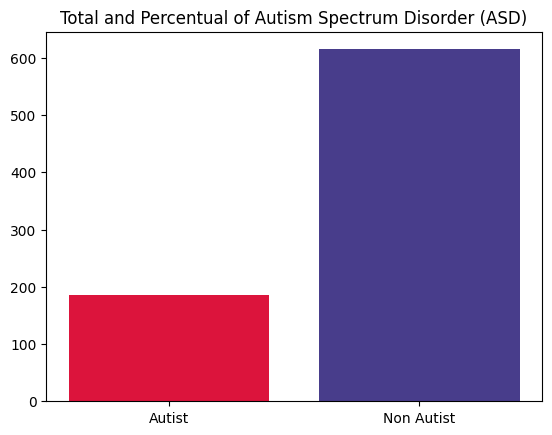

In [32]:
autist_count = train['Class/ASD'].sum()
non_autist_count = len(train) - autist_count

fig, ax = plt.subplots()

ax.bar(['Autist', 'Non Autist'], [autist_count, non_autist_count], color=['crimson', 'darkslateblue'])

plt.title('Total and Percentual of Autism Spectrum Disorder (ASD)')
plt.show()


In [33]:
train["ethnicity"].value_counts()

ethnicity
10    211
0     151
1     134
5     116
2      45
4      44
8      35
6      24
7      18
3      16
9       4
11      2
Name: count, dtype: int64

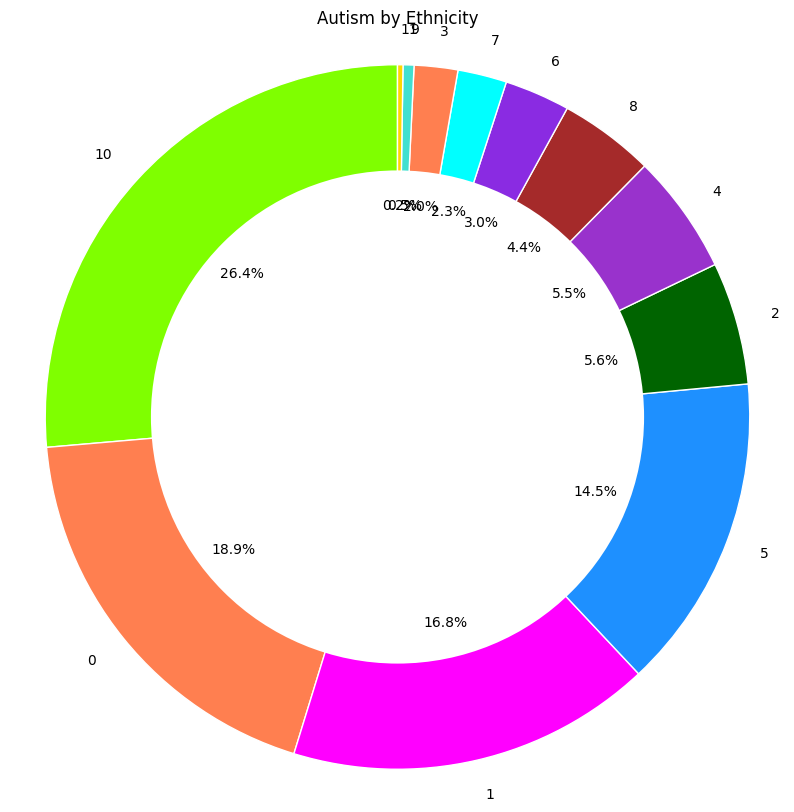

In [34]:
# Define colors for each ethnicity
ethnicity_colors = ['chartreuse', 'coral', 'magenta', 'dodgerblue', 'darkgreen', 'darkorchid', 'brown', 'BlueViolet', 'cyan', 'coral', 'Turquoise', 'Gold']

# Plotting the donut chart for ethnicity
fig, ax = plt.subplots(figsize=(10, 10))

# Extract ethnicity counts from the DataFrame
ethnicity_counts = train['ethnicity'].value_counts()

# Draw the donut chart
ax.pie(ethnicity_counts, labels=ethnicity_counts.index, autopct='%1.1f%%', startangle=90,
       colors=ethnicity_colors, wedgeprops=dict(width=0.4, edgecolor='w'))

# Draw a circle at the center to make it a donut chart
centre_circle = plt.Circle((0, 0), 0.70, fc='white')
fig = plt.gcf()
fig.gca().add_artist(centre_circle)

# Equal aspect ratio ensures that pie is drawn as a circle.
ax.axis('equal')

plt.title('Autism by Ethnicity')
plt.show()


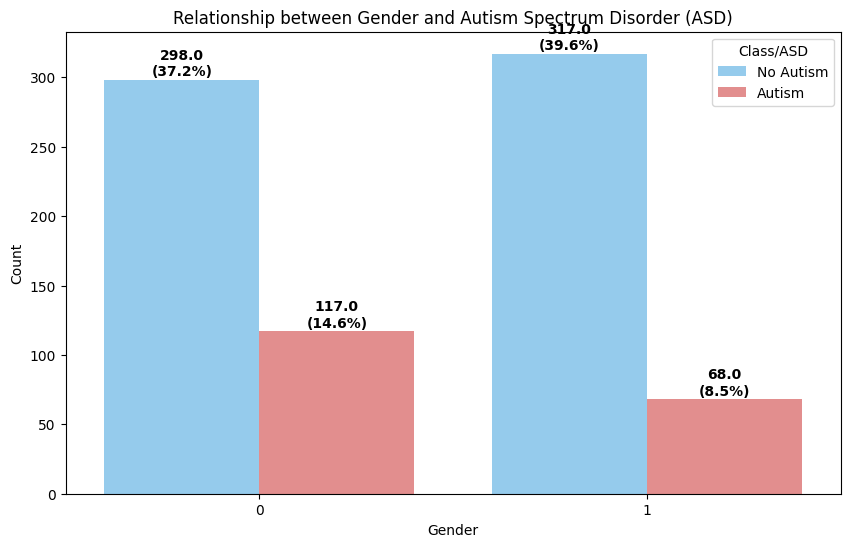

In [35]:
# Define colors for each class
class_colors = {0: 'lightskyblue', 1: 'lightcoral'}

# Plotting the relationship between Gender and Class/ASD with count and percentage
plt.figure(figsize=(10, 6))
ax = sns.countplot(x='gender', hue='Class/ASD', data=train, palette=class_colors)

# Adding annotations with count and percentage
total_count = len(train)
for p in ax.patches:
    height = p.get_height()
    ax.text(p.get_x() + p.get_width() / 2, height + 1, f'{height}\n({height / total_count * 100:.1f}%)',
            ha='center', va='bottom', fontweight='bold')

# Setting labels and title
plt.xlabel('Gender')
plt.ylabel('Count')
plt.title('Relationship between Gender and Autism Spectrum Disorder (ASD)')

# Change legend labels
ax.legend(title='Class/ASD', labels=['No Autism', 'Autism'])

# Display the plot
plt.show()


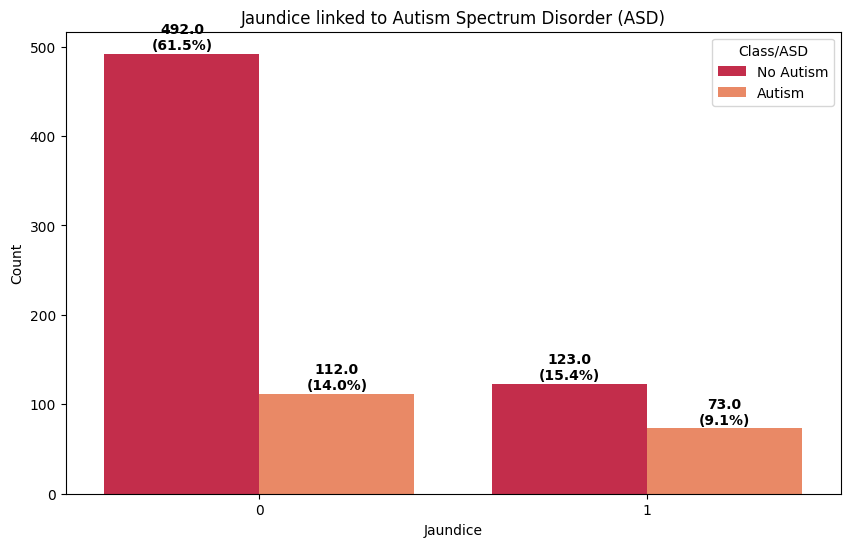

In [36]:
# Define colors for each class
jaundice_colors = ['crimson', 'coral']
jaundice_map = {'yes': 'Jaundice', 'no': 'No Jaundice'}

# Plotting the relationship between Jaundice and Class/ASD with count and percentage
plt.figure(figsize=(10, 6))
ax = sns.countplot(x='jaundice', hue='Class/ASD', data=train, palette=jaundice_colors)

# Adding annotations with count and percentage
total_count = len(train)
for p in ax.patches:
    height = p.get_height()
    ax.text(p.get_x() + p.get_width() / 2, height + 1, f'{height}\n({height / total_count * 100:.1f}%)',
            ha='center', va='bottom', fontweight='bold')

# Setting labels and title
plt.xlabel('Jaundice')
plt.ylabel('Count')
plt.title('Jaundice linked to Autism Spectrum Disorder (ASD)')

# Change legend labels
ax.legend(title='Class/ASD', labels=['No Autism', 'Autism'])

# Display the plot
plt.show()


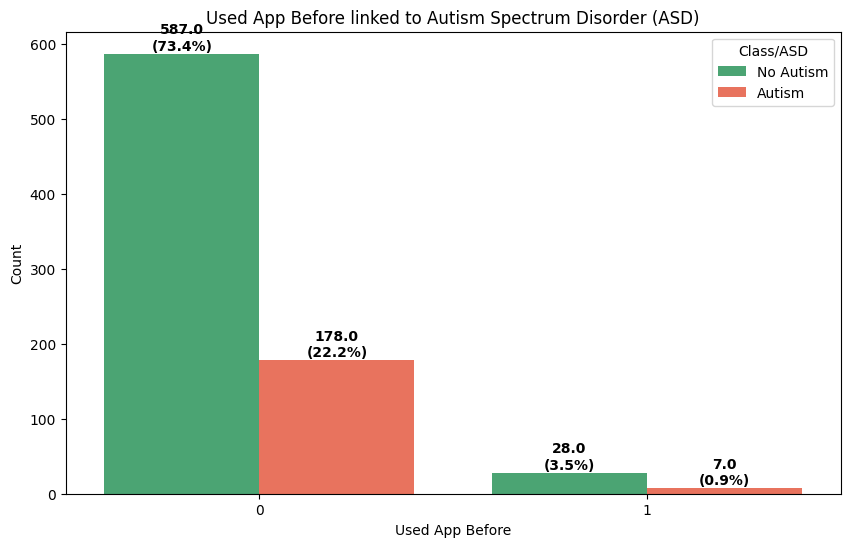

In [37]:
# Define colors for each class
used_app_colors = ['mediumseagreen', 'tomato']
used_app_map = {'yes': 'Used App Before', 'no': 'No App Usage'}

# Plotting the relationship between Used App Before and Class/ASD with count and percentage
plt.figure(figsize=(10, 6))
ax = sns.countplot(x='used_app_before', hue='Class/ASD', data=train, palette=used_app_colors)

# Adding annotations with count and percentage
total_count = len(train)
for p in ax.patches:
    height = p.get_height()
    ax.text(p.get_x() + p.get_width() / 2, height + 1, f'{height}\n({height / total_count * 100:.1f}%)',
            ha='center', va='bottom', fontweight='bold')

# Setting labels and title
plt.xlabel('Used App Before')
plt.ylabel('Count')
plt.title('Used App Before linked to Autism Spectrum Disorder (ASD)')

# Change legend labels
ax.legend(title='Class/ASD', labels=['No Autism', 'Autism'])

# Display the plot
plt.show()


/opt/conda/lib/python3.10/site-packages/seaborn/axisgrid.py:848: FutureWarning: 

`shade` is now deprecated in favor of `fill`; setting `fill=True`.
This will become an error in seaborn v0.14.0; please update your code.

  func(*plot_args, **plot_kwargs)
/opt/conda/lib/python3.10/site-packages/seaborn/axisgrid.py:848: FutureWarning: 

`shade` is now deprecated in favor of `fill`; setting `fill=True`.
This will become an error in seaborn v0.14.0; please update your code.

  func(*plot_args, **plot_kwargs)


<Figure size 1200x800 with 0 Axes>

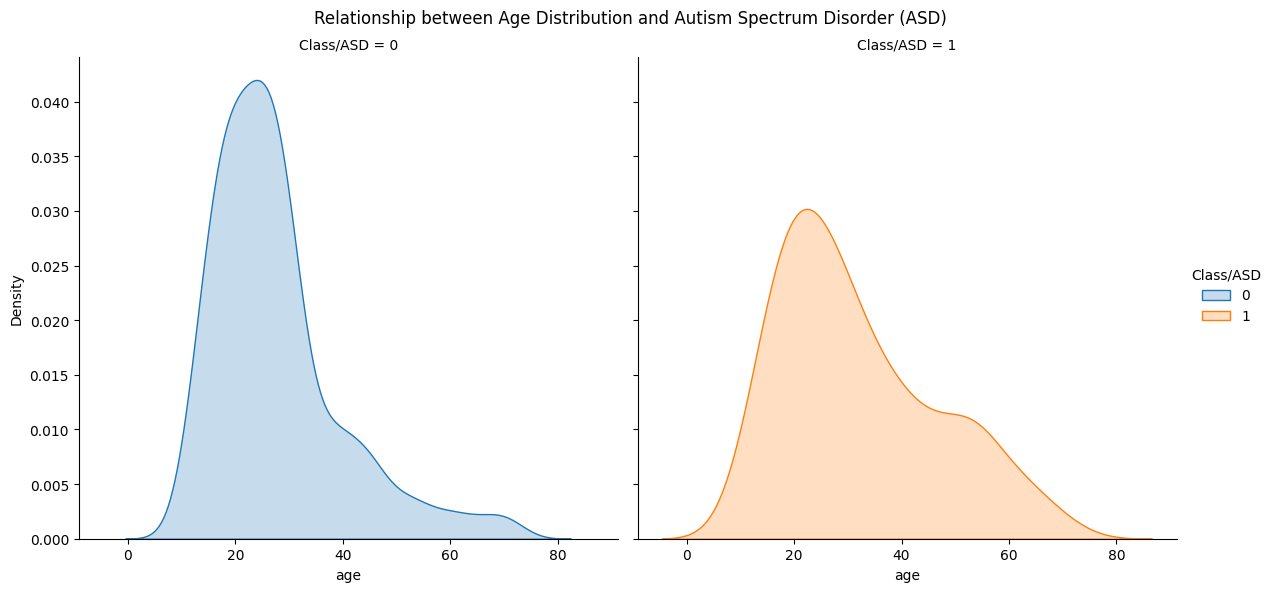

In [39]:
# Plotting the relationship between age distribution and Class/ASD
plt.figure(figsize=(12, 8))
g = sns.FacetGrid(train, col='Class/ASD', hue='Class/ASD', height=6)
g.map(sns.kdeplot, 'age', shade=True)
g.add_legend()

# Setting labels and title
plt.subplots_adjust(top=0.9)
g.fig.suptitle('Relationship between Age Distribution and Autism Spectrum Disorder (ASD)')

# Display the plot
plt.show()


# Preprocessing

### 1.Data dosen't have a null value

### 2.Data Encoding

In [6]:
train.head()

,ID,A1_Score,A2_Score,A3_Score,A4_Score,A5_Score,A6_Score,A7_Score,A8_Score,A9_Score,...,gender,ethnicity,jaundice,austim,contry_of_res,used_app_before,result,age_desc,relation,Class/ASD
0,1,1,0,1,1,1,1,0,1,1,...,f,White-European,no,no,United States,no,7.819715,18 and more,Self,0
1,2,0,0,0,0,0,0,0,0,0,...,f,South Asian,no,no,Australia,no,10.544296,18 and more,?,0
2,3,1,1,1,1,1,1,0,0,1,...,f,White-European,no,no,United Kingdom,no,13.167506,18 and more,Self,1
3,4,0,0,0,1,0,0,0,0,0,...,f,South Asian,no,no,New Zealand,no,1.530098,18 and more,?,0
4,5,0,0,0,0,1,0,0,0,1,...,m,Black,no,yes,Italy,no,7.949723,18 and more,Self,0


In [7]:
cat = {'ethnicity':'category',
       'gender':'category', 
       'jaundice':'category',
       'austim':'category',
       'contry_of_res':'category', 
       'used_app_before':'category',
        'age_desc':'category',
        'relation':'category'}
test = test.astype(cat)
train = train.astype(cat)

In [8]:
cat_columns = ['ethnicity', 'gender', 'jaundice', 'austim', 'contry_of_res', 'used_app_before', 'age_desc', 'relation']

for col in cat_columns:
    train[col] = train[col].cat.codes
    test[col] = test[col].cat.codes


In [9]:
train.head()

,ID,A1_Score,A2_Score,A3_Score,A4_Score,A5_Score,A6_Score,A7_Score,A8_Score,A9_Score,...,gender,ethnicity,jaundice,austim,contry_of_res,used_app_before,result,age_desc,relation,Class/ASD
0,1,1,0,1,1,1,1,0,1,1,...,0,10,0,0,58,0,7.819715,0,5,0
1,2,0,0,0,0,0,0,0,0,0,...,0,8,0,0,6,0,10.544296,0,0,0
2,3,1,1,1,1,1,1,0,0,1,...,0,10,0,0,57,0,13.167506,0,5,1
3,4,0,0,0,1,0,0,0,0,0,...,0,8,0,0,39,0,1.530098,0,0,0
4,5,0,0,0,0,1,0,0,0,1,...,1,2,0,1,32,0,7.949723,0,5,0


In [10]:
print(train.dtypes)

ID                   int64
A1_Score             int64
A2_Score             int64
A3_Score             int64
A4_Score             int64
A5_Score             int64
A6_Score             int64
A7_Score             int64
A8_Score             int64
A9_Score             int64
A10_Score            int64
age                float64
gender                int8
ethnicity             int8
jaundice              int8
austim                int8
contry_of_res         int8
used_app_before       int8
result             float64
age_desc              int8
relation              int8
Class/ASD            int64
dtype: object


### 3.Drob unusiful data

In [11]:
train=train.drop('ID', axis=1)
train=train.drop('relation', axis=1)

In [12]:
test=test.drop('ID', axis=1)
test=test.drop('relation', axis=1)

### 4.Split Data

In [13]:
X = train.drop('Class/ASD', axis=1)
y = train['Class/ASD']
X_train, X_val, y_train, y_val = train_test_split(X, y, test_size=0.2, random_state=42)

### 5.Standard Scaler


In [14]:
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_val = scaler.transform(X_val)

# Classification

## 1.Random Forest

In [42]:
# Define the evaluation function
def evaluate(ind):
    n_estimators, max_depth = ind
    n_estimators = max(1, int(n_estimators))
    max_depth = max(1, int(max_depth)) if max_depth is not None else None
    # Build the random forest classifier
    classifier = RandomForestClassifier(n_estimators=n_estimators, max_depth=max_depth, random_state=42)
    
    # Train the classifier on the training data
    classifier.fit(X_train, y_train)

    # Make predictions on the validation data
    y_pred = classifier.predict(X_val)

    # Evaluate the model
    accuracy = accuracy_score(y_val, y_pred)

    # Return accuracy as the fitness value
    return accuracy,

# Define Genetic Algorithm parameters
creator.create("FitnessMax", base.Fitness, weights=(1.0,))
creator.create("Individual", list, fitness=creator.FitnessMax)

toolbox = base.Toolbox()
toolbox.register("attr_float", np.random.uniform, 1, 200)  # n_estimators range from 10 to 200
toolbox.register("attr_int", np.random.randint, 1, 20)  # max_depth range from 1 to 20

toolbox.register("individual", tools.initCycle, creator.Individual,
                 (toolbox.attr_float, toolbox.attr_int),
                 n=1)
toolbox.register("population", tools.initRepeat, list, toolbox.individual)
toolbox.register("mate", tools.cxBlend, alpha=0.5)
toolbox.register("mutate", tools.mutGaussian, mu=0, sigma=5, indpb=0.2)
toolbox.register("select", tools.selTournament, tournsize=3)
toolbox.register("evaluate", evaluate)

# Create the initial population
population = toolbox.population(n=10)

# Run the Genetic Algorithm
algorithm_result = algorithms.eaMuPlusLambda(population, toolbox, mu=10, lambda_=50, cxpb=0.7, mutpb=0.2, ngen=10, stats=None, halloffame=None)

# Extract the best individual
best_individual = tools.selBest(population, 1)[0]

# Print the best individual's parameters
print("Best Individual from Genetic Algorithm:", best_individual)

# Build the random forest classifier using the best parameters
best_n_estimators, best_max_depth = best_individual
best_classifier = RandomForestClassifier(n_estimators=int(best_n_estimators), max_depth=int(best_max_depth), random_state=42)

# Train the classifier on the training data
best_classifier.fit(X_train, y_train)

# Make predictions on the validation data
y_pred = best_classifier.predict(X_val)

# Evaluate the model
accuracy = accuracy_score(y_val, y_pred)

# Print the accuracy of the model
print("Accuracy of Random Forest Classifier with Best Parameters:", accuracy)


/opt/conda/lib/python3.10/site-packages/deap/creator.py:185: RuntimeWarning: A class named 'FitnessMax' has already been created and it will be overwritten. Consider deleting previous creation of that class or rename it.
  warnings.warn("A class named '{0}' has already been created and it "
/opt/conda/lib/python3.10/site-packages/deap/creator.py:185: RuntimeWarning: A class named 'Individual' has already been created and it will be overwritten. Consider deleting previous creation of that class or rename it.
  warnings.warn("A class named '{0}' has already been created and it "


gen	nevals
0  	10    
1  	44    
2  	45    
3  	41    
4  	46    
5  	45    
6  	43    
7  	48    
8  	44    
9  	45    
10 	49    
Best Individual from Genetic Algorithm: [11.427179304456082, 6.593298350845953]
Accuracy of Random Forest Classifier with Best Parameters: 0.85


In [18]:
classifier = RandomForestClassifier()

# Train the classifier on the training data
classifier.fit(X_train, y_train)

# Make predictions on the test data
y_pred = classifier.predict(X_val)

In [19]:
# Confusion Matrix
conf_matrix = confusion_matrix(y_val, y_pred)
print("Confusion Matrix:")
print(conf_matrix)

# Accuracy
accuracy = accuracy_score(y_val, y_pred)
print("Accuracy:", accuracy)

# Classification Report
class_report = classification_report(y_val, y_pred)
print("Classification Report:")
print(class_report)

Confusion Matrix:
[[105  16]
 [ 11  28]]
Accuracy: 0.83125
Classification Report:
              precision    recall  f1-score   support

           0       0.91      0.87      0.89       121
           1       0.64      0.72      0.67        39

    accuracy                           0.83       160
   macro avg       0.77      0.79      0.78       160
weighted avg       0.84      0.83      0.83       160



ROC-AUC Score: 0.7928586564950202


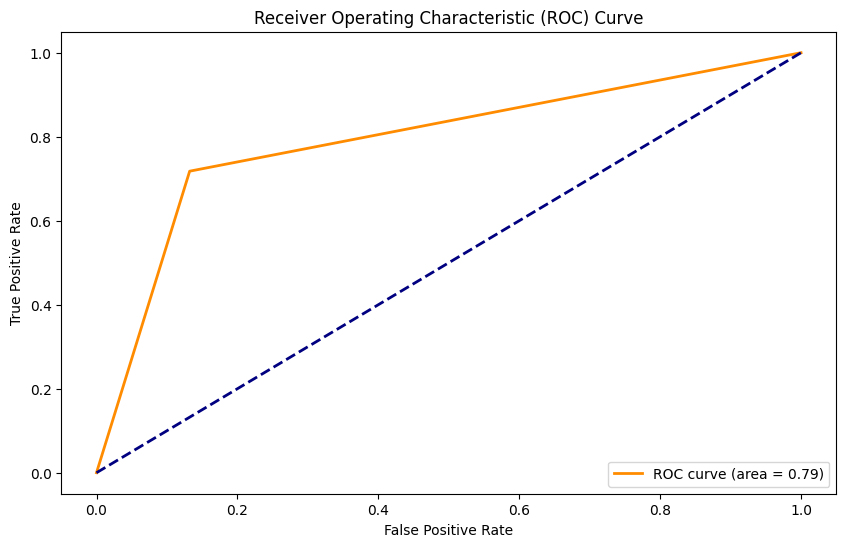

In [20]:
# ROC-AUC Score
roc_auc = roc_auc_score(y_val, y_pred)
print("ROC-AUC Score:", roc_auc)

# ROC Curve
fpr, tpr, thresholds = roc_curve(y_val, y_pred)
plt.figure(figsize=(10, 6))
plt.plot(fpr, tpr, color='darkorange', lw=2, label='ROC curve (area = %0.2f)' % roc_auc)
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC) Curve')
plt.legend(loc="lower right")
plt.show()

## 2. ANN model

In [17]:
# Define the evaluation function
def evaluate(ind):
    units_1, units_2, epochs, batch_size = ind

    # Build the neural network
    model = Sequential()
    model.add(Dense(units=units_1, activation='relu', input_dim=X_train.shape[1]))
    model.add(Dense(units=units_2, activation='relu'))
    model.add(Dense(units=1, activation='sigmoid'))
    model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])

    # Train the model
    model.fit(X_train, y_train, epochs=int(epochs), batch_size=int(batch_size), verbose=0)

    # Evaluate the model
    _, accuracy = model.evaluate(X_val, y_val, verbose=0)

    # Return accuracy as the fitness value
    return accuracy,

# Define Genetic Algorithm parameters
creator.create("FitnessMax", base.Fitness, weights=(1.0,))
creator.create("Individual", list, fitness=creator.FitnessMax)

toolbox = base.Toolbox()
toolbox.register("attr_int", np.random.randint, 5, 50)  # Units range from 5 to 50
toolbox.register("attr_epochs", np.random.randint, 10, 100)  # Number of epochs range from 10 to 100
toolbox.register("attr_batch_size", np.random.choice, [8, 16, 32, 64])  # Batch size options

toolbox.register("individual", tools.initCycle, creator.Individual,
                 (toolbox.attr_int, toolbox.attr_int, toolbox.attr_epochs, toolbox.attr_batch_size),
                 n=1)
toolbox.register("population", tools.initRepeat, list, toolbox.individual)
toolbox.register("mate", tools.cxTwoPoint)
toolbox.register("mutate", tools.mutGaussian, mu=0, sigma=5, indpb=0.2)
toolbox.register("select", tools.selTournament, tournsize=3)
toolbox.register("evaluate", evaluate)

# Create the initial population
population = toolbox.population(n=10)

# Run the Genetic Algorithm
algorithm_result = algorithms.eaMuPlusLambda(population, toolbox, mu=10, lambda_=50, cxpb=0.7, mutpb=0.2, ngen=10, stats=None, halloffame=None)

# Extract the best individual
best_individual = tools.selBest(population, 1)[0]

# Print the best individual's parameters
print("Best Individual:", best_individual)

# Build the neural network with the best individual's parameters
best_units_1, best_units_2, best_epochs, best_batch_size = map(abs, best_individual)

classifier = Sequential()

# Adding the input layer and the first hidden layer
classifier.add(Dense(units=int(best_units_1), activation='relu', input_dim=X_train.shape[1]))

# Adding the second hidden layer
classifier.add(Dense(units=int(best_units_2), activation='relu'))

# Adding the output layer
classifier.add(Dense(units=1, activation='sigmoid'))

# Compile the ANN
classifier.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])

# Train the ANN on the training data
classifier.fit(X_train, y_train, batch_size=int(best_batch_size), epochs=int(best_epochs))

# Make predictions on the validation data
y_predict = classifier.predict(X_val)
y_predict = (y_predict > 0.5)


gen	nevals
0  	10    
1  	45    
2  	46    
3  	45    
4  	42    
5  	43    
6  	44    
7  	44    
8  	46    
9  	46    
10 	48    
Best Individual: [20, 21, 22.71048536494525, 64]
Epoch 1/22
10/10 [==============================] - 1s 2ms/step - loss: 0.7864 - accuracy: 0.4734
Epoch 2/22
10/10 [==============================] - 0s 2ms/step - loss: 0.6760 - accuracy: 0.6516
Epoch 3/22
10/10 [==============================] - 0s 3ms/step - loss: 0.5893 - accuracy: 0.7312
Epoch 4/22
10/10 [==============================] - 0s 3ms/step - loss: 0.5256 - accuracy: 0.7891
Epoch 5/22
10/10 [==============================] - 0s 3ms/step - loss: 0.4734 - accuracy: 0.8141
Epoch 6/22
10/10 [==============================] - 0s 3ms/step - loss: 0.4307 - accuracy: 0.8313
Epoch 7/22
10/10 [==============================] - 0s 2ms/step - loss: 0.3964 - accuracy: 0.8500
Epoch 8/22
10/10 [==============================] - 0s 3ms/step - loss: 0.3692 - accuracy: 0.8594
Epoch 9/22
10/10 [=================

In [28]:
classifier = Sequential()

# Adding the input layer and the first hidden layer
classifier.add(Dense(units=20, activation='relu', input_dim=X_train.shape[1]))

# Adding the second hidden layer
classifier.add(Dense(units=21, activation='relu'))

# Adding the output layer
classifier.add(Dense(units=1, activation='sigmoid'))

# Compile the ANN
classifier.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])

# Train the ANN on the training data
classifier.fit(X_train, y_train, batch_size=32, epochs=50)

# Make predictions on the validation data
y_predict = classifier.predict(X_val)
y_predict = (y_predict > 0.5)



Epoch 1/50
20/20 [==============================] - 1s 2ms/step - loss: 0.4870 - accuracy: 0.8469
Epoch 2/50
20/20 [==============================] - 0s 2ms/step - loss: 0.4045 - accuracy: 0.8687
Epoch 3/50
20/20 [==============================] - 0s 2ms/step - loss: 0.3522 - accuracy: 0.8781
Epoch 4/50
20/20 [==============================] - 0s 2ms/step - loss: 0.3218 - accuracy: 0.8766
Epoch 5/50
20/20 [==============================] - 0s 2ms/step - loss: 0.3034 - accuracy: 0.8734
Epoch 6/50
20/20 [==============================] - 0s 2ms/step - loss: 0.2930 - accuracy: 0.8813
Epoch 7/50
20/20 [==============================] - 0s 2ms/step - loss: 0.2861 - accuracy: 0.8828
Epoch 8/50
20/20 [==============================] - 0s 2ms/step - loss: 0.2806 - accuracy: 0.8859
Epoch 9/50
20/20 [==============================] - 0s 2ms/step - loss: 0.2753 - accuracy: 0.8922
Epoch 10/50
20/20 [==============================] - 0s 2ms/step - loss: 0.2707 - accuracy: 0.8922
Epoch 11/50
20/20 [

In [29]:
# Evaluate the model
conf_matrix = confusion_matrix(y_val, y_predict)
print("Confusion Matrix:")
print(conf_matrix)

accuracy = accuracy_score(y_val, y_predict)
print("Accuracy:", accuracy)

class_report = classification_report(y_val, y_predict)
print("Classification Report:")
print(class_report)

Confusion Matrix:
[[105  16]
 [ 10  29]]
Accuracy: 0.8375
Classification Report:
              precision    recall  f1-score   support

           0       0.91      0.87      0.89       121
           1       0.64      0.74      0.69        39

    accuracy                           0.84       160
   macro avg       0.78      0.81      0.79       160
weighted avg       0.85      0.84      0.84       160



ROC-AUC Score: 0.805679169315533


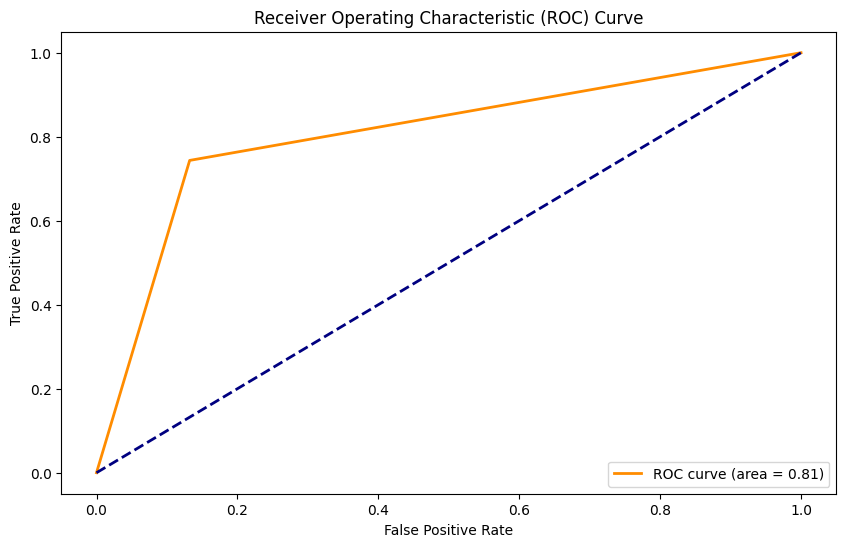

In [30]:
roc_auc = roc_auc_score(y_val, y_predict)
print("ROC-AUC Score:", roc_auc)

# ROC Curve
fpr, tpr, thresholds = roc_curve(y_val, y_predict)
plt.figure(figsize=(10, 6))
plt.plot(fpr, tpr, color='darkorange', lw=2, label='ROC curve (area = %0.2f)' % roc_auc)
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC) Curve')
plt.legend(loc="lower right")
plt.show()
